WATER JUG PROBLEM


In [ ]:
from collections import deque

def BFS(a, b, target):
    m = {}
    isSolvable = False
    path = []
    q = deque()
    q.append((0, 0))

    while (len(q) > 0):
        u = q.popleft()
        if ((u[0], u[1]) in m):
            continue
        if ((u[0] > a or u[1] > b or
            u[0] < 0 or u[1] < 0)):
            continue
        path.append([u[0], u[1]])
        m[(u[0], u[1])] = 1
        if (u[0] == target or u[1] == target):
            isSolvable = True
            if (u[0] == target):
                if (u[1] != 0):
                    path.append([u[0], 0])
            else:
                if (u[0] != 0):
                    path.append([0, u[1]])
            sz = len(path)
            for i in range(sz):
                print("(", path[i][0], ",",
                    path[i][1], ")")
            break
        q.append([u[0], b])
        q.append([a, u[1]])
        for ap in range(max(a, b) + 1):
            c = u[0] + ap
            d = u[1] - ap
            if (c == a or (d == 0 and d >= 0)):
                q.append([c, d])
            c = u[0] - ap
            d = u[1] + ap
            if ((c == 0 and c >= 0) or d == b):
                q.append([c, d])
        q.append([a, 0])
        q.append([0, b])
    if (not isSolvable):
        print("No solution")

if __name__ == '__main__':
    Jug1, Jug2, target = 4, 3, 2
    print("Path from initial state to solution state :")
    BFS(Jug2, Jug1, target)


Path from initial state to solution state :
( 0 , 0 )
( 0 , 4 )
( 3 , 0 )
( 3 , 4 )
( 3 , 1 )
( 0 , 3 )
( 3 , 3 )
( 2 , 4 )
( 2 , 0 )


S ALGO


In [ ]:
import pandas as pd

In [ ]:
data=pd.DataFrame({"Samples":[1,2,3,4,5],
                   "Fever":["Yes","No","Yes","No","Yes"],
                   "Cough":["Yes","Yes","Yes","No","Yes"],
                   "Difficulty Breathing":["No","No","Yes","No","Yes"],
                   "Diagnosed Disease":["Pneumonia","Common Cold","Pneumonia","Healthy","Pneumonia"]})
data

,Samples,Fever,Cough,Difficulty Breathing,Diagnosed Disease
0,1,Yes,Yes,No,Pneumonia
1,2,No,Yes,No,Common Cold
2,3,Yes,Yes,Yes,Pneumonia
3,4,No,No,No,Healthy
4,5,Yes,Yes,Yes,Pneumonia


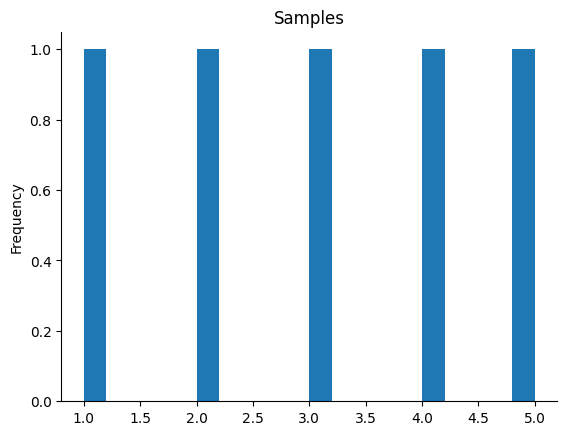

In [ ]:
from matplotlib import pyplot as plt
data['Samples'].plot(kind='hist', bins=20, title='Samples')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
target="Pneumonia"
symptoms=["Fever","Cough","Difficulty Breathing"]
filter=data[data["Diagnosed Disease"]==target]
print(filter)

   Samples Fever Cough Difficulty Breathing Diagnosed Disease
0        1   Yes   Yes                   No         Pneumonia
2        3   Yes   Yes                  Yes         Pneumonia
4        5   Yes   Yes                  Yes         Pneumonia


In [ ]:
positive=filter[filter[symptoms]=="Yes"].shape[0]
print(positive)

3


In [ ]:
total=filter.shape[0]
print(total)

3


In [ ]:
print(f"Rule: If a patient has {', '.join(symptoms)}, then they are likely to have {target}")


Rule: If a patient has Fever, Cough, Difficulty Breathing, then they are likely to have Pneumonia


In [ ]:
support = positive/total
print(f"Support : {support:.2f}")

Support : 1.00


In [ ]:
confidence=positive/data[data[symptoms]=="Yes"].shape[0]
print(f"Confidence : {confidence:.2f}")

Confidence : 0.60


candidate elimination

In [ ]:
import numpy as np

class CandidateElimination:
    def __init__(self, num_features):
        # Initialize the most specific and most general hypotheses
        self.S = ['0'] * num_features
        self.G = ['?'] * num_features

    def specialize_G(self, example):
        # Specialize the most general hypothesis based on a positive example
        for i in range(len(self.G)):
            if self.G[i] == '?':
                self.G[i] = example[i]
            elif self.G[i] != example[i]:
                self.G[i] = '?'

    def generalize_S(self, example):
        # Generalize the most specific hypothesis based on a negative example
        for i in range(len(self.S)):
            if self.S[i] != example[i] and self.S[i] != '0':
                self.S[i] = '?'

    def fit(self, examples):
        for example in examples:
            label = example[-1]  # Last element is the label
            if label == 'Yes':
                self.specialize_G(example[:-1])  # Update G for positive example
            else:
                self.generalize_S(example[:-1])  # Update S for negative example

    def get_final_hypothesis(self):
        return self.S, self.G

# Example dataset
examples = [
    ['Big', 'Red', 'Circle', 'No'],
    ['Small', 'Red', 'Triangle', 'No'],
    ['Small', 'Red', 'Circle', 'Yes'],
    ['Big', 'Blue', 'Circle', 'No']
]

# Initialize CandidateElimination object
ce = CandidateElimination(num_features=len(examples[0]) - 1)  # -1 for excluding label

# Fit the data
ce.fit(examples)

# Get the final hypothesis
final_specific_hypothesis, final_general_hypothesis = ce.get_final_hypothesis()

print("Final Specific Hypothesis:", final_specific_hypothesis)
print("Final General Hypothesis:", final_general_hypothesis)


Final Specific Hypothesis: ['0', '0', '0']
Final General Hypothesis: ['Small', 'Red', 'Circle']


In [ ]:
data = [
    ('Big', 'Red', 'Circle', 'No'),
    ('Small', 'Red', 'Triangle', 'No'),
    ('Small', 'Red', 'Circle', 'Yes'),
    ('Big', 'Blue', 'Circle', 'No'),
    ('Small', 'Blue', 'Circle','Yes')
]
def get_domains(data):
    d = [set() for i in data[0]]
    for x in data:
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]
get_domains(data)
def g_0(n):
    return ('?',)*n

def s_0(n):
    return ('Phi',)*n
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == '?' or (x != 'Phi' and (x == y or y == 'Phi'))
        more_general_parts.append(mg)
    return all(more_general_parts)

def consistent(hypothesis,example):
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not consistent(h[i:i+1],x[i:i+1]):
            if h[i] != 'Phi':
                h_new[i] = '?'
            else:
                h_new[i] = x[i]
    return [tuple(h_new)]

def generalize_S(x, G, S):
    S_prev = list(S)
    for s in S_prev:
        if s not in S:
            continue
        if not consistent(s,x):
            S.remove(s)
            Splus = min_generalizations(s, x)
            S.update([h for h in Splus if any([more_general(g,h)
                                               for g in G])])

            S.difference_update([h for h in S if
                                 any([more_general(h, h1)
                                      for h1 in S if h != h1])])
    return S

def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == '?':
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != 'Phi':
            h_new = h[:i] + ('Phi',) + h[i+1:]
            results.append(h_new)
    return results

def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if consistent(g,x):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            G.update([h for h in Gminus if any([more_general(h, s)
                                                for s in S])])
            G.difference_update([h for h in G if
                                 any([more_general(g1, h)
                                      for g1 in G if h != g1])])
    return G

def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]

    G = set([g_0(len(domains))])
    S = set([s_0(len(domains))])
    i=0
    print('All the hypotheses in General and Specific boundary are:\n')
    print('\n G[{0}]:'.format(i),G)
    print('\n S[{0}]:'.format(i),S)
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]
        if cx=='Yes':
            G = {g for g in G if consistent(g,x)}
            S = generalize_S(x, G, S)
        else:
            S = {s for s in S if not consistent(s,x)}
            G = specialize_G(x, domains, G, S)
        print('\n G[{0}]:'.format(i),G)
        print('\n S[{0}]:'.format(i),S)
    return
candidate_elimination(data)


ID3


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Read the dataset
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NNML/house_purchase.xlsx')

# Check the columns of the DataFrame
print(df.columns)

# Define the entropy function
def entropy(s):
    p = [(s == c).mean() for c in set(s)]
    return sum([-pi * np.log2(pi) for pi in p if pi != 0])


# Define the information gain function
def info_gain(data, attribute, target):
    totalE = entropy(data[target])
    vals, counts = np.unique(data[attribute], return_counts=True)
    wt = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[attribute] == val).dropna()[target]) for i, val in enumerate(vals)])
    return totalE - wt

# Define the ID3 algorithm
def id3(data, og, features, target, parent_node_class=None):
    if len(np.unique(data[target])) <= 1:
        return np.unique(data[target])[0]
    elif len(data) == 0:
        return np.unique(og[target])[np.argmax(np.unique(og[target], return_counts=True)[1])]
    elif len(features) == 0:
        return parent_node_class
    else:
        parent_node_class = np.unique(data[target])[np.argmax(np.unique(data[target], return_counts=True)[1])]
    item = [info_gain(data, feature, target) for feature in features]
    bestI = np.argmax(item)
    bestF = features[bestI]
    tree = {bestF: {}}
    features = [i for i in features if i != bestF]
    for value in np.unique(data[bestF]):
        value = value
        sub = data.where(data[bestF] == value).dropna()
        subtree = id3(sub, df, features, target, parent_node_class)
        tree[bestF][value] = subtree
    return tree

# Define the predict function
def predict(query, tree):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return "Cannot make a prediction"
            result = tree[key][query[key]]
            if isinstance(result, dict):
                return predict(query, result)
            else:
                return result

# Define the query dictionary
query = {'Age': 30, 'Income': 50000, 'Gender': 'Male', 'MaritalStatus': 'Single'}

# Define features and target
features = ['Age', 'Income', 'Gender', 'MaritalStatus']
target = 'Buy'

# Build the decision tree
tree = id3(df, df, features, target)

# Predict the class label
prediction = predict(query, tree)
print("Predicted class label:", prediction)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Age', 'Income', 'Gender', 'MaritalStatus', 'Buy'], dtype='object')
Predicted class label: N


In [ ]:
import pandas as pd

# Creating a more varied dataset
data = pd.DataFrame({
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Mild', 'Cool', 'Mild'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong'],
    'PlayTennis': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No']
})

# Step 1: Initialize h to the most specific hypothesis in H
hypothesis = pd.Series(['ϕ'] * (len(data.columns) - 1), index=data.columns[:-1])

# Display the initial hypothesis
print("Step 1: Initial Hypothesis")
print(hypothesis, "\n")

# Step 2: Iterate through positive examples
for index, row in data.iterrows():
    if row['PlayTennis'] == 'Yes':
        for attribute in data.columns[:-1]:
            # If the constraint ai is satisfied by x, do nothing
            if hypothesis[attribute] == 'ϕ' or hypothesis[attribute] == row[attribute]:
                pass
            # Replace ai in h with the next more general constraint that is satisfied by x
            else:
                hypothesis[attribute] = '?'

# Display the final hypothesis
print("Step 3: Final Hypothesis")
print(hypothesis)


NAIVE BAYES CLASSIFICATION


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_style("darkgrid")

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NNML/BreastCancerData.csv')
data.head(10)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


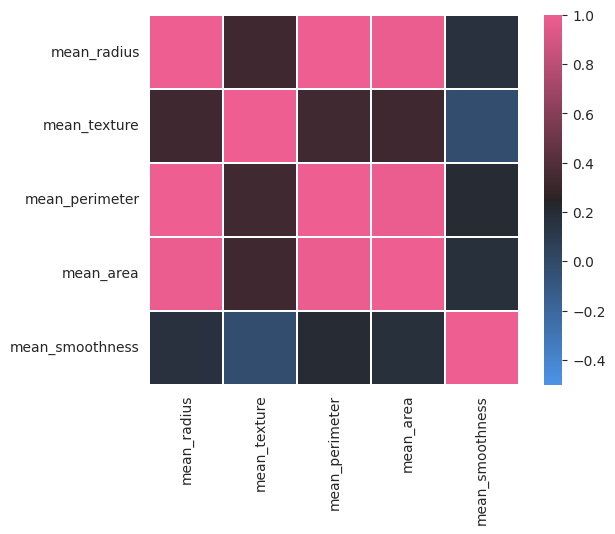

In [ ]:
#EDA
corr = data.iloc[:, :-1].corr(method='pearson')
cmap = sn.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)

sn.heatmap(corr, vmax=1, vmin=-0.5, cmap=cmap, square=True, linewidths=0.2)
plt.show()


In [ ]:
#correlation pearson
data = data[['mean_radius', 'mean_texture', 'mean_smoothness', 'diagnosis']]
data.head(10)


,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


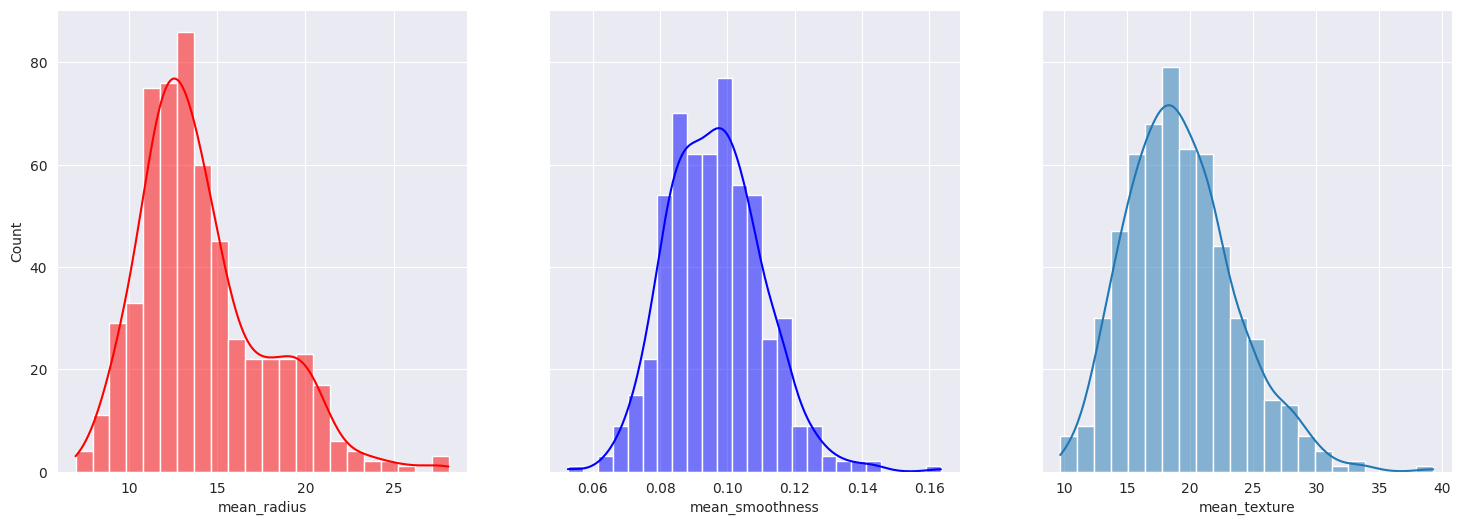

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sn.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sn.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sn.histplot(data, ax=axes[2], x="mean_texture", kde=True)
plt.show()

In [ ]:
def calculate_prior(df, Y):
    # Get the unique classes in the specified column Y
    classes = sorted(list(df[Y].unique()))

    # Initialize an empty list to store the prior probabilities
    prior = []

    # Iterate over each class
    for i in classes:
        # Calculate the prior probability for the class and append it to the list
        prior.append(len(df[df[Y] == i]) / len(df))

    return prior


In [ ]:
import numpy as np

def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)

    # Filter the dataframe to include only rows where the class label Y matches the specified label
    df = df[df[Y] == label]

    # Calculate the mean and standard deviation of the feature values for the specified class
    mean, std = df[feat_name].mean(), df[feat_name].std()

    # Calculate the probability density function (PDF) of the feature value given the class using Gaussian distribution
    P_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val - mean) ** 2 / (2 * std ** 2)))

    return P_x_given_y


In [ ]:
import numpy as np

def naive_bayes_gaussian(df, X, Y):
    # Get feature names
    features = list(df.columns)[:-1]

    # Calculate prior probabilities
    prior = calculate_prior(df, Y)

    # Initialize list to store predicted class labels
    Y_pred = []

    # Loop over every data sample
    for x in X:
        # Initialize likelihood list
        labels = sorted(list(df[Y].unique()))
        likelihood = [1] * len(labels)

        # Calculate likelihood for each class
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # Calculate posterior probability (numerator only)
        post_prob = [1] * len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        # Append the predicted class label based on maximum posterior probability
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)


In [ ]:
ia

Confusion Matrix:
[[36  4]
 [ 0 74]]
F1 Score: 0.9736842105263158
